In [1]:
# sim annealing for 1d function
# sim annealing with temp and step schedule
# sim annealing for rastrigin function
# parallel annealing for rastrigin function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
def func(x):
	return np.exp(-(x - 1)**2/100) * np.cos(x)

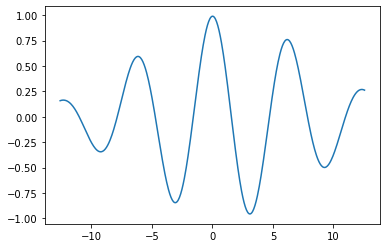

In [4]:
left_x = -4 * np.pi
right_x = 4 * np.pi
x = np.linspace(left_x, right_x, 501)
plt.plot(x, func(x));

In [5]:
# get starting point
# calculate energy
# draw step from cauchi distribution
# metropolis criterion
# lower temperature

T_min = 0.01
T_max = 0.1 
T_steps = 100

T_schedule = T_max / np.log(np.arange(2, T_steps+2))

eq_steps = 100

x_current = left_x + (right_x - left_x) * np.random.random()
x_lst = []

for T in T_schedule:
	# equilibrate
	for i in range(eq_steps):
		x_new = np.random.normal(loc=x_current, scale=5.0);
		x_new = left_x + (x_new - left_x) % (right_x - left_x)
		dE = func(x_new) - func(x_current)
		if (dE < 0 or np.exp(-dE/T) > np.random.rand()):
			x_current = x_new
		x_lst.append(x_current)

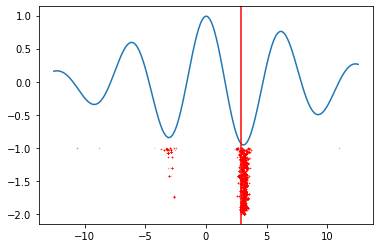

In [6]:
plt.plot(x, func(x));
plt.scatter(x_lst, np.linspace(-1, -2, len(x_lst)), c='r', s=0.3, alpha=0.2)
plt.axvline(x_lst[-1], c='r');

In [7]:
# rastrigin function
def rastr(x):
	f = 10 * len(x)
	for i in range(len(x)):
		f += (x[i] ** 2 - 10 * np.cos(2 * np.pi * x[i]))
	return f

(40, 40)


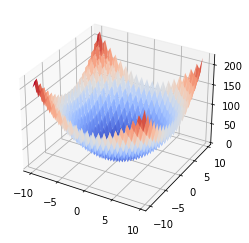

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y = np.mgrid[-10:10:0.5, -10:10:0.5]
surf = ax.plot_surface(X, Y, rastr((X, Y)), cmap=cm.coolwarm, antialiased=True)
print(rastr((X, Y)).shape)

In [70]:
# get starting point
# calculate energy
# draw step from cauchi distribution
# metropolis criterion
# lower temperature

T_max = 1
T_min = 0.01
T_steps = 100

T_schedule = T_max / np.log(np.arange(2, T_steps + 2))

n = 25

eq_steps = 100 * n

x_current = left_x + (right_x - left_x) * np.random.random(size=(n, ))
x_lst = [x_current, ]

for T in T_schedule:
	# equilibrate
	for i in range(eq_steps):
		x_new = np.random.normal(loc=x_current, scale=1.0, size=(n, ));
		x_new = left_x + (x_new - left_x) % (right_x - left_x)
		for i in range(len(x_current)):
			x_new_dim = np.copy(x_current);
			x_new_dim[i] = x_new[i];
			dE = rastr(x_new_dim) - rastr(x_current)
			if (dE < 0 or np.exp(-dE/T) > np.random.rand()):
				x_current = x_new_dim
			x_lst.append(x_current)

In [71]:
solution = x_lst[-1]
start_point = x_lst[0]
x_lst_T = np.array(x_lst).T

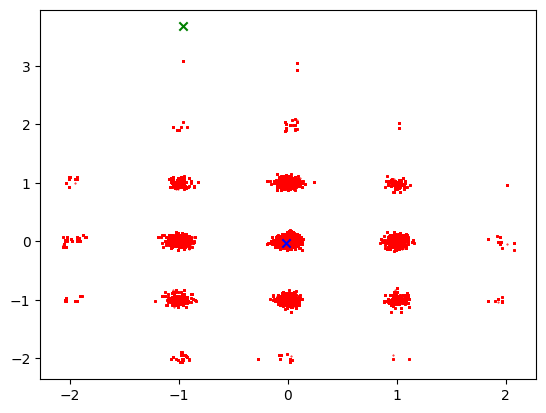

In [81]:
plt.scatter(x_lst_T[0], x_lst_T[1], c='r', s=0.2);
plt.scatter(solution[0], solution[1], c='blue', marker='x');
plt.scatter(start_point[0], start_point[1], c='green', marker='x');

In [73]:
100 * (np.abs(solution) < 0.1).sum() / len(solution)

100.0